# Incidence de la varicelle

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import isoweek

Les données de l'incidence de la varicelle sont disponibles sur le site web du [Réseau Sentinelles](https://www.sentiweb.fr/datasets/incidence-PAY-7.csv). Ces données ont été téléchargées sous la forme d'un fichier en format CSV. Elles seront extraites ici à partir du fichier télécharger et non pas à partir de l'adresse URL du fichier, afin de prévenir un potentiel changement d'URL ou une modification de la version du jeu de données utilisé.

Voici l'explication des colonnes données [sur le site d'origine](https://ns.sentiweb.fr/incidence/csv-schema-v1.json):

| Nom de colonne | Libellé de colonne                                                                                                                |
|----------------|-----------------------------------------------------------------------------------------------------------------------------------|
| week           | Semaine calendaire (ISO 8601)                                                                                                     |
| indicator      | Code de l'indicateur de surveillance                                                                                              |
| inc            | Estimation de l'incidence de consultations en nombre de cas                                                                       |
| inc_low        | Estimation de la borne inférieure de l'IC95% du nombre de cas de consultation                                                     |
| inc_up         | Estimation de la borne supérieure de l'IC95% du nombre de cas de consultation                                                     |
| inc100         | Estimation du taux d'incidence du nombre de cas de consultation (en cas pour 100,000 habitants)                                   |
| inc100_low     | Estimation de la borne inférieure de l'IC95% du taux d'incidence du nombre de cas de consultation (en cas pour 100,000 habitants) |
| inc100_up      | Estimation de la borne supérieure de l'IC95% du taux d'incidence du nombre de cas de consultation (en cas pour 100,000 habitants) |
| geo_insee      | Code de la zone géographique concernée (Code INSEE) http://www.insee.fr/fr/methodes/nomenclatures/cog/                            |
| geo_name       | Libellé de la zone géographique (ce libellé peut être modifié sans préavis)                                                       |

La première ligne du fichier CSV est un commentaire, que nous ignorons en précisant `skiprows=1`.

In [2]:
raw_data = pd.read_csv("incidence-PAY-7.csv", skiprows=1)
raw_data

week  indicator    inc  inc_low  inc_up  inc100  inc100_low  \
0     202016          7    778       80    1476       1           0   
1     202015          7   1918      675    3161       3           1   
2     202014          7   3879     2227    5531       6           3   
3     202013          7   7326     5236    9416      11           8   
4     202012          7   8123     5790   10456      12           8   
5     202011          7  10198     7568   12828      15          11   
6     202010          7   9011     6691   11331      14          10   
7     202009          7  13631    10544   16718      21          16   
8     202008          7  10424     7708   13140      16          12   
9     202007          7   8959     6574   11344      14          10   
10    202006          7   9264     6925   11603      14          10   
11    202005          7   8505     6314   10696      13          10   
12    202004          7   7991     5831   10151      12           9   
13    202003          7   5968     4100    7836       9           6   
14    202002          7   6534     4530    8538      10           7   
15    202001          7   9835     7019   12651      15          11   
16    201952          7   7941     5246   10636      12           8   
17    201951          7   5823     3675    7971       9           6   
18    201950          7   6424     4276    8572      10           7   
19    201949          7   6621     4540    8702      10           7   
20    201948          7   5542     3383    7701       8           5   
21    201947          7   7536     5058   10014      11           7   
22    201946          7   2638     1316    3960       4           2   
23    201945          7   4492     2615    6369       7           4   
24    201944          7   5728     3627    7829       9           6   
25    201943          7   4834     2751    6917       7           4   
26    201942          7   6279     3989    8569      10           7   
27    201941          7   4130     2030    6230       6           3   
28    201940          7   4211     2218    6204       6           3   
29    201939          7   3137     1310    4964       5           2   
...      ...        ...    ...      ...     ...     ...         ...   
1503  199126          7  17608    11304   23912      31          20   
1504  199125          7  16169    10700   21638      28          18   
1505  199124          7  16171    10071   22271      28          17   
1506  199123          7  11947     7671   16223      21          13   
1507  199122          7  15452     9953   20951      27          17   
1508  199121          7  14903     8975   20831      26          16   
1509  199120          7  19053    12742   25364      34          23   
1510  199119          7  16739    11246   22232      29          19   
1511  199118          7  21385    13882   28888      38          25   
1512  199117          7  13462     8877   18047      24          16   
1513  199116          7  14857    10068   19646      26          18   
1514  199115          7  13975     9781   18169      25          18   
1515  199114          7  12265     7684   16846      22          14   
1516  199113          7   9567     6041   13093      17          11   
1517  199112          7  10864     7331   14397      19          13   
1518  199111          7  15574    11184   19964      27          19   
1519  199110          7  16643    11372   21914      29          20   
1520  199109          7  13741     8780   18702      24          15   
1521  199108          7  13289     8813   17765      23          15   
1522  199107          7  12337     8077   16597      22          15   
1523  199106          7  10877     7013   14741      19          12   
1524  199105          7  10442     6544   14340      18          11   
1525  199104          7   7913     4563   11263      14           8   
1526  199103          7  15387    10484   20290      27          18   
1527  199102          7  16277  

In [3]:
raw_data[raw_data.isnull().any(axis=1)]

Empty DataFrame
Columns: [week, indicator, inc, inc_low, inc_up, inc100, inc100_low, inc100_up, geo_insee, geo_name]
Index: []

Aucune ligne n'est vide dans ce document, il ne manque pas de données.

Nos données utilisent une convention inhabituelle: le numéro de
semaine est collé à l'année, donnant l'impression qu'il s'agit
de nombre entier. C'est comme ça que Pandas les interprète.
  
Un deuxième problème est que Pandas ne comprend pas les numéros de
semaine.  Il faut lui fournir les dates de début et de fin de
semaine. Nous utilisons pour cela la bibliothèque `isoweek`.

Comme la conversion des semaines est devenu assez complexe, nous
écrivons une petite fonction Python pour cela. Ensuite, nous
l'appliquons à tous les points de nos donnés. Les résultats vont
dans une nouvelle colonne 'period'.

In [4]:
def convert_week(year_and_week_int):
    year_and_week_str = str(year_and_week_int)
    year = int(year_and_week_str[:4])
    week = int(year_and_week_str[4:])
    w = isoweek.Week(year, week)
    return pd.Period(w.day(0), 'W')

raw_data['period'] = [convert_week(yw) for yw in raw_data['week']]

Il restent deux petites modifications à faire.

Premièrement, nous définissons les périodes d'observation
comme nouvel index de notre jeux de données. Ceci en fait
une suite chronologique, ce qui sera pratique par la suite.

Deuxièmement, nous trions les points par période, dans
le sens chronologique.

In [5]:
sorted_data = raw_data.set_index('period').sort_index()

Nous vérifions la cohérence des données. Entre la fin d'une période et
le début de la période qui suit, la différence temporelle doit être
zéro, ou au moins très faible. Nous laissons une "marge d'erreur"
d'une seconde.

À la différence de l'analyse de l'incidence du syndrome grippal, il ne semble pas y avoir d'erreurs ou d'incohérences dans le jeu de données :

In [6]:
periods = sorted_data.index
for p1, p2 in zip(periods[:-1], periods[1:]):
    delta = p2.to_timestamp() - p1.end_time
    if delta > pd.Timedelta('1s'):
        print(p1, p2)

De la même manière que pour l'incidence du syndrome grippal, la représentation graphique de ces données est la suivante :

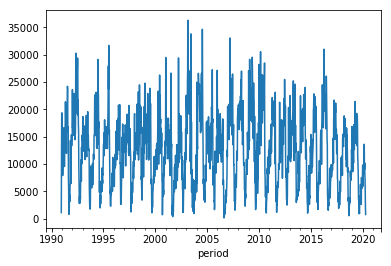

In [7]:
sorted_data['inc'].plot()

Par un zoom sur la situation des dernières années, on remarque que les incidences semblent plus réparties sur l'année entière avec un creux cependant en début de période hivernale.

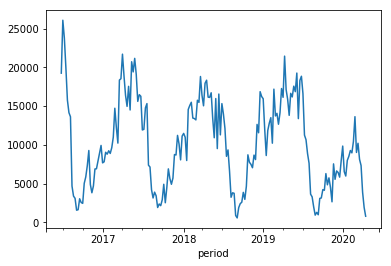

In [8]:
sorted_data['inc'][-200:].plot()

# Étude de l'incidence annuelle

Malgré que les incidences de l'épidémie ne forme pas un pic précis, nous allons essayer de définir la période de référence entre deux minima de l'incidence, soit le 15 octobre de l'année $N$ au 15 octobre de l'année $N+1$

Notre tâche est un peu compliquée par le fait que l'année ne comporte
pas un nombre entier de semaines. Nous modifions donc un peu nos périodes
de référence: à la place du 15 octobre de chaque année, nous utilisons le
premier jour de la semaine qui contient le 15 octobre.

Encore un petit détail: les données commencent à la fin de l'année 1990, ce qui rend la première année considérée incomplète. Nous commençons donc l'analyse au 15 octobre 1991.

In [12]:
first_october_week = [pd.Period(pd.Timestamp(y, 10, 15), 'W')
                     for y in range(1991, 
                                    sorted_data.index[-1].year)]

En partant de cette liste des semaines qui contiennent le 15 octobre, nous obtenons nos intervalles d'environ un an comme les périodes entre deux semaines adjacentes dans cette liste. Nous calculons les sommes des incidences hebdomadaires pour toutes ces périodes.

Nous vérifions également que ces périodes contiennent entre 51 et 52 semaines, pour nous protéger contre des éventuelles erreurs dans notre code.

In [14]:
year = []
yearly_incidence = []
for week1, week2 in zip(first_october_week[:-1],
                        first_october_week[1:]):
    one_year = sorted_data['inc'][week1:week2-1]
    assert abs(len(one_year)-52) < 2
    yearly_incidence.append(one_year.sum())
    year.append(week2.year)
yearly_incidence = pd.Series(data=yearly_incidence, index=year)

Voici les incidences annuelles :

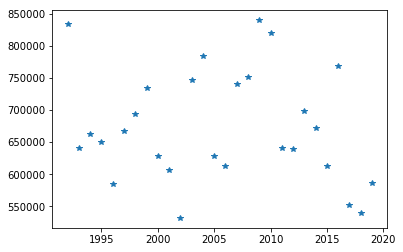

In [15]:
yearly_incidence.plot(style='*')

Une liste triée permet de plus facilement répérer les baleurs les plus élevées (à la fin) :

In [16]:
yearly_incidence.sort_values()

2002    532097
2018    539810
2017    552448
1996    584922
2019    586670
2001    606610
2015    612835
2006    612861
2000    627919
2005    629150
2012    639641
1993    640388
2011    641667
1995    649640
1994    663465
1997    666802
2014    672296
1998    693579
2013    699031
1999    734329
2007    741092
2003    747377
2008    751881
2016    768084
2004    784636
2010    819324
1992    834024
2009    839723
dtype: int64

Enfin, un histogramme montre que l'épidémie touche généralement autour de 10 % de la population française chaque année.

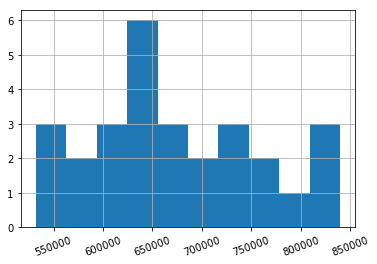

In [18]:
yearly_incidence.hist(xrot=20)